In [1]:
import numpy as np

In [2]:
# 클릭률 theta에 해당하는 배열 생성
thetas = np.linspace(0,1,1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [3]:
# 가능도함수 likelihood function
# r 은 클릭 (0 또는 1 입력)
likelihood = lambda r: thetas if r else (1 - thetas)

In [4]:
# 사후분포 계산하는 함수
# 가능도함수와 사전함수 곱의 합이 1이되도록 정규화됨.
def posterior(r,prior):
    lp = likelihood(r) * prior
    return lp / lp.sum()

In [5]:
# 각 theta가 같은확률 갖도록 균등확률분포 설정 
p = np.array([1 / len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [6]:
# posterior 메서드를 이용해 베이즈 추론
# 예시로 클릭이 한 번(r=1)이 일어났을 때 사후분포 계샨
p = posterior(1,p)
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


In [7]:
from matplotlib import pyplot as plt

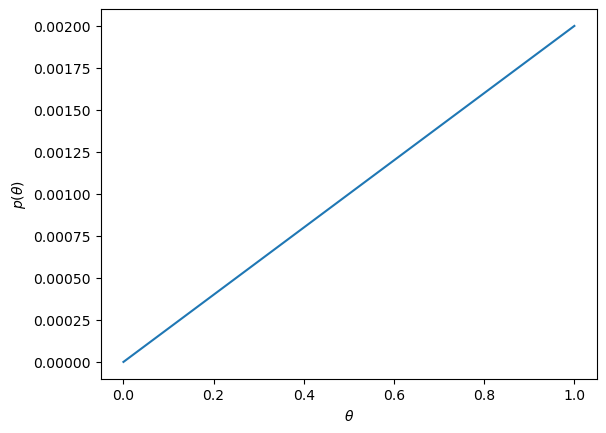

In [8]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

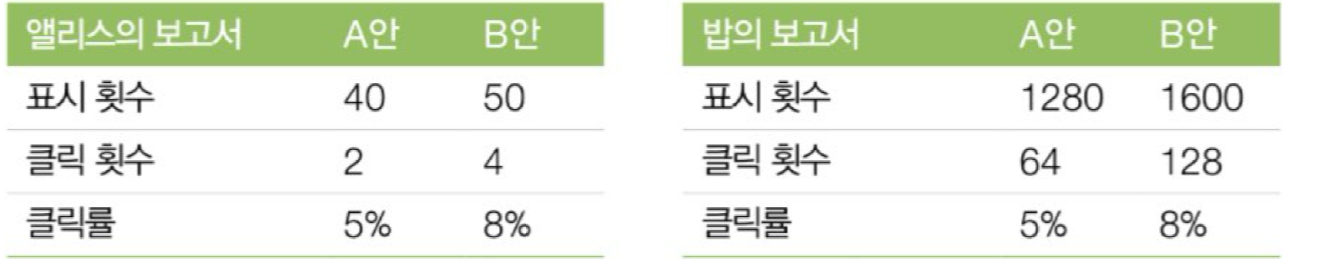

In [9]:
# 엘리스의 보고서에서 A안의 사후분포 다뤄보기
clicks = 2
noclicks = 38

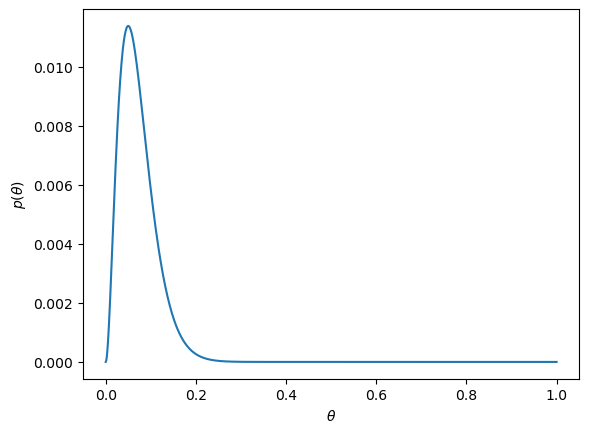

In [10]:
# 균일분포의 사전분포 정의
p = np.array([1 / len(thetas) for theta in thetas])

for _ in range(clicks):
    p = posterior(1,p)
for _ in range(noclicks):
    p = posterior(0,p)

plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()